In [1]:
import numpy as np
from matplotlib import pyplot as plt
import bgp_qnm_fits as bgp
import corner

# Constants
ID = '0013'
DATA_TYPE = 'news'
SPHERICAL_MODES = [(2, 2), (3, 2)]
THRESHOLD = 0.9
N_MAX = 6
t0 = 10
T = 100
N_DRAWS = 10000
INCLUDE_CHIF = False
INCLUDE_MF = False
t0_vals = np.arange(0, 40.1, 2)

sim = bgp.SXS_CCE(ID, type=DATA_TYPE, lev="Lev5", radius="R2")
tuned_param_dict_GP = bgp.get_tuned_param_dict("GP", data_type=DATA_TYPE)[ID]
Mf, chif = sim.Mf, sim.chif_mag

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


In [ ]:
import json 
sim_id = '0013' 
t0 = 20 

full_modes_list = [] 
p_values_median = [] 

with open(f'mode_content_files/mode_content_data_{sim_id}.json', 'r') as f:
    mode_content_data_dict = json.load(f)

full_modes_list = [list(map(tuple, inner_list)) for inner_list in mode_content_data_dict["modes"]]
unique_modes = list({mode for modes in full_modes_list for mode in modes})
spherical_modes = [tuple(mode) for mode in mode_content_data_dict['spherical_modes']]
t0_vals = np.array(mode_content_data_dict['times'])

fits = [] 


select_modes = full_modes_list[i]
fits.append(bgp.BGP_fit(sim.times, 
                            sim.h, 
                            select_modes, 
                            sim.Mf, 
                            sim.chif_mag, 
                            tuned_param_dict_GP, 
                            bgp.kernel_GP, 
                            t0=t0, 
                            T=T, 
                            decay_corrected=True,
                            strain_parameters=True,
                            num_samples=1000,
                            spherical_modes = spherical_modes,
                            include_chif=INCLUDE_CHIF,
                            include_Mf=INCLUDE_MF,
                            data_type=DATA_TYPE)
            )
                

Fitting from t0=0.0
Adding mode (2, 2, 1, 1) with significance 1.0.
Adding mode (3, 2, 1, 1) with significance 1.0.
Adding mode (2, 2, 2, 1) with significance 1.0.
Adding mode (3, 2, 2, 1) with significance 1.0.
Adding mode (2, 2, 3, 1) with significance 1.0.
Adding mode (3, 2, 3, 1) with significance 1.0.
Adding mode (2, 2, 4, 1) with significance 1.0.
Adding mode (3, 2, 4, 1) with significance 1.0.
Adding mode (3, 2, 5, 1) with significance 1.0.
Adding mode (2, 2, 5, 1) with significance 1.0.
Adding mode (3, 2, 6, 1) with significance 1.0.
Adding mode (2, 2, 6, -1) with significance 1.0.
Adding mode (3, 2, 6, -1) with significance 1.0.
Adding mode (3, 2, 4, -1) with significance 1.0.
Adding mode (3, 2, 5, -1) with significance 1.0.
Adding mode (2, 2, 1, -1) with significance 1.0.
Adding mode (2, 2, 2, -1) with significance 1.0.
Adding mode (3, 2, 3, -1) with significance 1.0.
Adding mode (3, 2, 2, -1) with significance 1.0.
Adding mode (3, 2, 1, -1) with significance 1.0.
Adding mode

KeyboardInterrupt: 

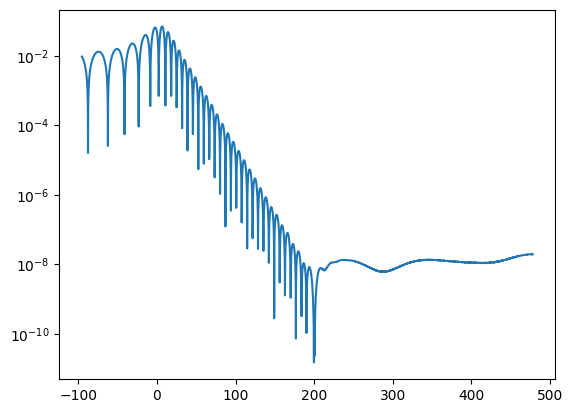

In [2]:
plt.plot(sim.times, abs(sim.h[(2,2)].real), label='Waveform')
plt.yscale('log')
plt.show() 

In [3]:
candidate_modes_1 = [(2, 2, n, 1) for n in range(7)] + [(3, 2, n, 1) for n in range(7)]

full_fit_1 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_1,
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_1 = full_fit_1.fit["model_array_linear"]
times_1 = full_fit_1.fit["analysis_times"]
data_1 = full_fit_1.fit["data_array_masked"]

residual_1 = data_1 - model_1
r_squared_1 = np.einsum("st, st -> ", np.conj(residual_1), residual_1).real


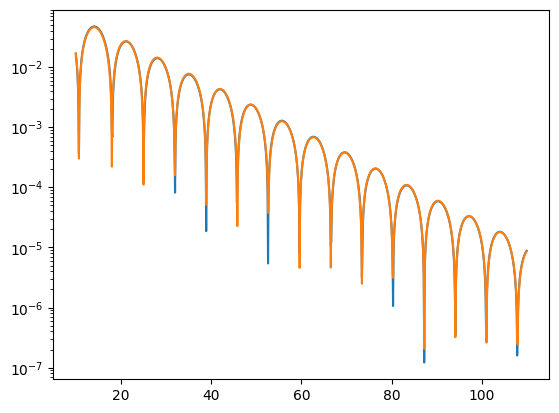

In [4]:
plt.plot(times_1, np.abs(np.real(data_1[0])), label="Data 1")
plt.plot(times_1, np.abs(np.real(model_1[0])), label="Model 1")
plt.yscale('log')

In [4]:
candidate_modes_2 = [(2, 2, n, 1) for n in range(2)]

full_fit_2 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_2 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_2 = full_fit_2.fit["model_array_linear"]
times_2 = full_fit_2.fit["analysis_times"]
data_2 = full_fit_2.fit["data_array_masked"]

residual_2 = data_2 - model_2
r_squared_2 = np.einsum("st, st -> ", np.conj(residual_2), residual_2).real

In [6]:
import json 

with open(f'mode_content_data_0.9999_big.json', 'r') as f:
    mode_content_data_dict = json.load(f)
    

In [7]:
t0_vals = np.array(mode_content_data_dict['times'])
spherical_modes = [tuple(mode) for mode in mode_content_data_dict['spherical_modes']]
initial_modes = [tuple(mode) for mode in mode_content_data_dict['initial_modes']]
candidate_modes = [tuple(mode) for mode in mode_content_data_dict['candidate_modes']]

In [10]:
full_modes_list = [list(map(tuple, inner_list)) for inner_list in mode_content_data_dict["0001"]]

In [12]:
test_mode = (3,3,0,1,3,3,0,1)

fits = [] 

for i, t0 in enumerate(t0_vals):

    select_modes = full_modes_list[i]
    fits.append(bgp.BGP_fit(sim.times, 
                                sim.h, 
                                select_modes, 
                                sim.Mf, 
                                sim.chif_mag, 
                                tuned_param_dict_GP, 
                                bgp.kernel_GP, 
                                t0=t0, 
                                T=T, 
                                decay_corrected=True,
                                spherical_modes = spherical_modes,
                                include_chif=False,
                                include_Mf=False,
                                data_type=DATA_TYPE)
                )

AttributeError: type object 'qnm' has no attribute 'Qmu_D'

In [1]:
import qnmfits 

i = 5
j = 5
d = 3
h = 2
b = 3
f = 2
s1 = -2
s2 = -2

qnmfits.spatial_mapping_functions.kappa(i, j, d, h, b, f, s1, s2)

0.38976996741258707

In [9]:
qnmfits.qnm.mu(4, 4, 4, 4, 0, 1, 0.7, -2)

(0.9953321510087162+0j)

In [5]:
l4 = 6
m4 = 6
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(151.40429141891235-3.4723255992986166j)]

In [10]:
l4 = 7
m4 = 6
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(39.27704821122107-6.69183861544011j)]

In [11]:
l4 = 7
m4 = 7
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(-1.2382917330848276e-14-1.8423170825584093e-14j)]

In [2]:
import json 

with open(f'mode_content_files/mode_content_data_0001.json', 'r') as f:
    mode_content_data_dict = json.load(f)

In [6]:
mode_content_data_dict["run_time"] / (60*60)

7.551827344695727

In [1]:
N_MAX = 6

SPHERICAL_MODES_PE = [(2, 2),
                      (3, 2), 
                      (4, 4), (4, 2),
                      (5, 4), (5, 2),
                      (6, 6), (6, 4),
                      (7, 6)]
                      
SPHERICAL_MODES_EVERYTHING_PE = [(2, 2),
                                (3, 2), 
                                (4, 4), (4, 2),
                                (5, 4), (5, 2),
                                (6, 6), (6, 4), (6, 2),
                                (7, 6), (7, 4), (7, 2)]

In [4]:
candidate_modes = [(*s, n, 1) for s in SPHERICAL_MODES_EVERYTHING_PE for n in range(0, N_MAX + 1)] + \
                        [(*s, n, -1) for s in SPHERICAL_MODES_EVERYTHING_PE for n in range(0, N_MAX + 1)] + \
                        SPHERICAL_MODES_EVERYTHING_PE + \
                        [
                            (2, 2, 0, 1, 2, 2, 0, 1),
                            (3, 3, 0, 1, 3, 3, 0, 1),
                            (2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1)
                        ]

In [5]:
print(len(candidate_modes))

183


(-10.0, 100.0)

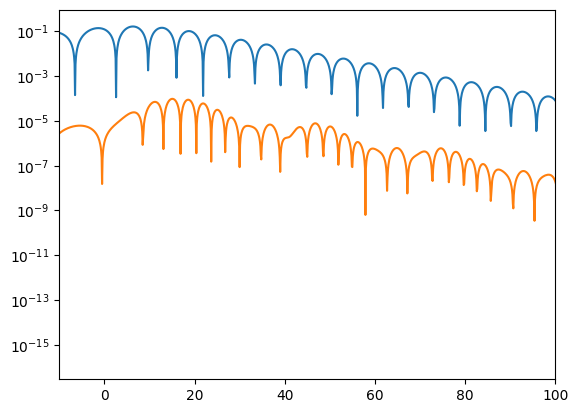

In [13]:

plt.plot(sim.times, np.abs(np.real(sim.h[(2,2)])))
plt.plot(sim.times, np.abs(np.real(sim.h[(5,2)])))
plt.yscale('log')
plt.xlim(-10, 100)

In [4]:
import bgp_qnm_fits as bgp

sim = bgp.SXS_CCE("0013", type="news", lev="Lev5", radius="R2")

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


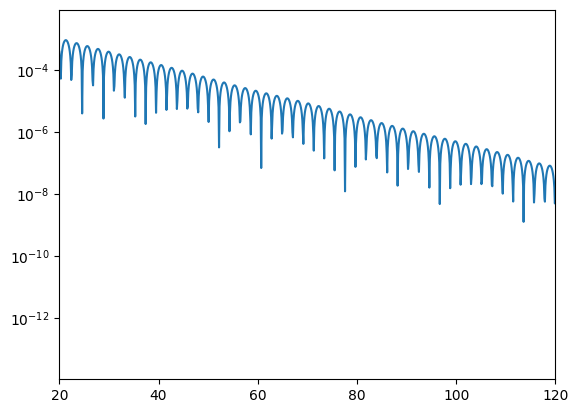

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(sim.times, np.abs(np.real(sim.h[(6,-6)])))
#plt.plot(sim.times, np.abs(np.real(sim.h[(6,-6)])))
plt.yscale('log')
plt.xlim(20, 120)
plt.show() 